**Import Necessary Modules**

In [64]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm
import statsmodels.api as sm

In [78]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tabulate import tabulate

**Read Dataset**

In [2]:
df_cust = pd.read_csv('Case Study - Customer.csv', sep=';')
df_product = pd.read_csv('Case Study - Product.csv', sep=';')
df_store = pd.read_csv('Case Study - Store.csv', sep=';')
df_trans = pd.read_csv('Case Study - Transaction.csv', sep=';')

###**Data Cleansing**

In [3]:
df_cust.sample(10)

,CustomerID,Age,Gender,Marital Status,Income
258,259,59,1,Married,"4,44"
288,289,29,0,Married,"2,37"
93,94,53,0,Married,"12,94"
59,60,56,0,Married,"10,61"
411,412,18,1,Single,0
116,117,45,1,Married,"12,55"
430,431,40,1,Married,"9,51"
432,433,48,1,Married,"11,97"
303,304,34,0,Single,"8,55"
441,442,42,1,Married,"14,88"


In [4]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [5]:
df_cust.dropna(subset=['Marital Status'], inplace=True)

In [6]:
# Ubah tipe data Income menjadi float

#Mengubah ',' menjadi '.'
df_cust['Income'] = df_cust['Income'].str.replace(',', '.')

#Mengubah tipe data
df_cust['Income'] = df_cust['Income'].astype(float)

In [7]:
df_cust.sample(10)

,CustomerID,Age,Gender,Marital Status,Income
326,327,50,0,Married,12.41
35,36,32,1,Married,10.40
151,152,59,1,Married,10.68
23,24,37,0,Married,9.53
369,370,26,1,Single,1.28
268,269,39,1,Married,6.30
397,398,33,0,Married,7.44
84,85,59,1,Married,7.89
290,291,49,0,Married,19.98
402,403,30,0,Married,4.06


In [8]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      444 non-null    int64  
 1   Age             444 non-null    int64  
 2   Gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.8+ KB


In [9]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [10]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [11]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [12]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-62.000000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [13]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [14]:
df_trans.sample(10)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
4732,TR4334,298,10/12/2022,P2,3200,4,12800,6
790,TR54890,364,27/02/2022,P10,15000,4,60000,12
3144,TR27017,133,16/08/2022,P1,8800,2,17600,5
3439,TR28643,175,08/09/2022,P4,12000,1,12000,10
3086,TR77093,149,11/08/2022,P10,15000,1,15000,8
4679,TR21207,267,06/12/2022,P1,8800,7,61600,13
1309,TR29006,321,02/04/2022,P10,15000,5,75000,1
3079,TR27321,441,11/08/2022,P4,12000,2,24000,10
3853,TR15108,206,05/10/2022,P7,9400,4,37600,9
4050,TR83691,73,21/10/2022,P5,4200,4,16800,8


In [15]:
# Ubah tipe data kolom 'Date' menjadi datetype
df_trans['Date'] = pd.to_datetime(df_trans['Date'], format='%d/%m/%Y')
df_trans['Date'].head()

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Date, dtype: datetime64[ns]

In [16]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


###**Merge Data**

In [17]:
df_merge = pd.merge(df_trans, df_cust, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [18]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [19]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price           4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   float64       
 12  Product Name    4976 non-null   object        
 13  StoreName       4976 non-null   object        
 14  GroupStore      4976 non-null   object        
 15  Type

In [20]:
df_merge.corr()

<ipython-input-20-4d19dbde0e81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()


,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.014821,-0.012024,-0.025266,0.005470,-0.021120,-0.015863,0.005440,-0.000485,-0.008277
Price,-0.014821,1.000000,-0.354614,0.440046,-0.031782,0.013781,0.012132,0.000636,-0.014220,-0.007418
Qty,-0.012024,-0.354614,1.000000,0.620804,0.012169,-0.026745,-0.011920,-0.027724,-0.009999,0.007538
TotalAmount,-0.025266,0.440046,0.620804,1.000000,-0.011283,-0.016458,-0.009479,-0.024816,-0.024048,-0.000246
StoreID,0.005470,-0.031782,0.012169,-0.011283,1.000000,-0.004783,0.000449,0.000739,0.543010,-0.242255
Age,-0.021120,0.013781,-0.026745,-0.016458,-0.004783,1.000000,-0.026879,0.485532,-0.007572,0.023614
Gender,-0.015863,0.012132,-0.011920,-0.009479,0.000449,-0.026879,1.000000,-0.067612,0.010022,-0.022346
Income,0.005440,0.000636,-0.027724,-0.024816,0.000739,0.485532,-0.067612,1.000000,0.006318,0.021516
Latitude,-0.000485,-0.014220,-0.009999,-0.024048,0.543010,-0.007572,0.010022,0.006318,1.000000,-0.045423
Longitude,-0.008277,-0.007418,0.007538,-0.000246,-0.242255,0.023614,-0.022346,0.021516,-0.045423,1.000000


###**Machine Learning Regression Time Series**

In [21]:
df_reg = df_merge.groupby(['Date']).agg({'Qty': 'sum'}).reset_index()

In [22]:
df_reg

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,28
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


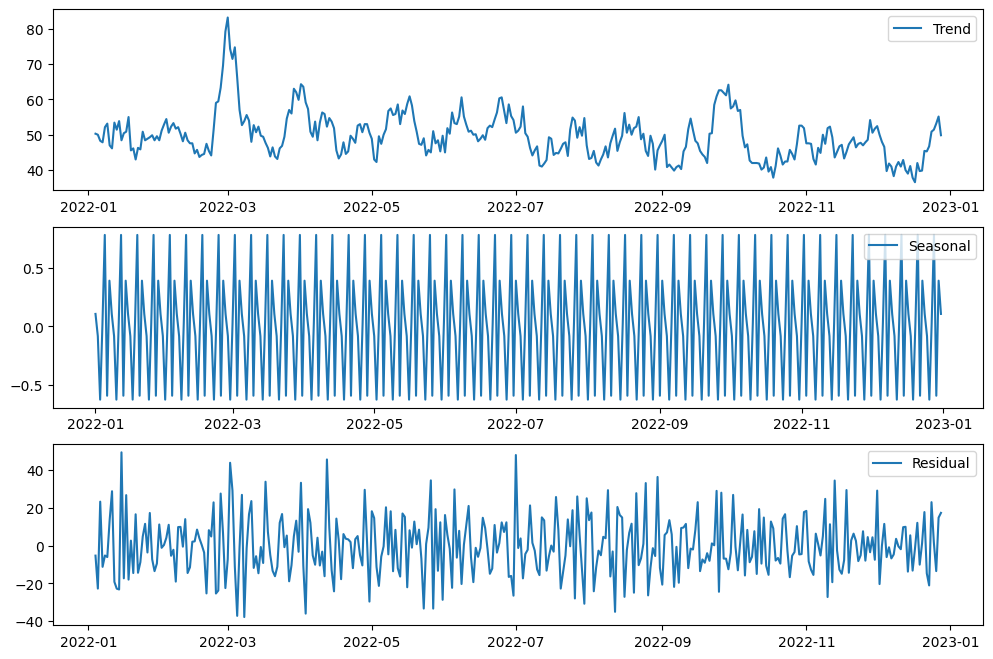

In [23]:
# Perform seasonal decomposition
result= seasonal_decompose(df_reg.set_index(['Date']))

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(312)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(313)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.show()


**Check Data Stationary**

In [24]:
# Extract the 'Qty' column
qty_data = df_reg['Qty']

# Perform the Augmented Dickey-Fuller test
result = adfuller(qty_data)

# Print the test statistics and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print('The time series is stationary (reject the null hypothesis)')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis)')


ADF Statistic: -19.24830156679947
p-value: 0.0
The time series is stationary (reject the null hypothesis)


**Split Data**

In [25]:
cut_off = round(df_reg.shape[0] * 0.8)
df_train = df_reg[:cut_off]
df_test = df_reg[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [26]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,28
...,...,...
287,2022-10-15,33
288,2022-10-16,24
289,2022-10-17,53
290,2022-10-18,47


In [27]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,40


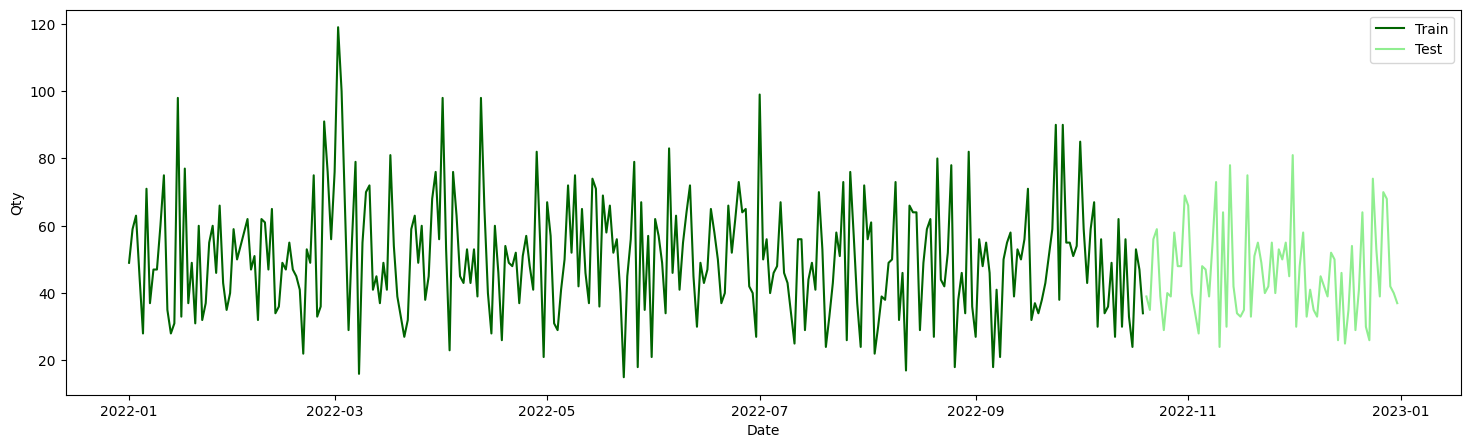

In [28]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty'], color='darkgreen', label='Train')
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty'], color='lightgreen', label='Test')
plt.legend()
plt.show()

###**Mencari Value p, d, q**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

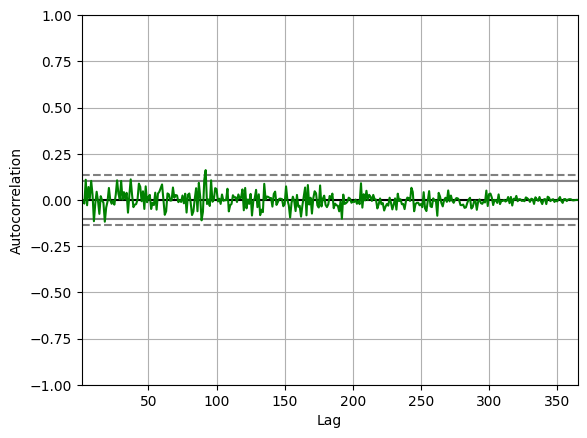

In [29]:
autocorrelation_plot(df_reg['Qty'], color='green')

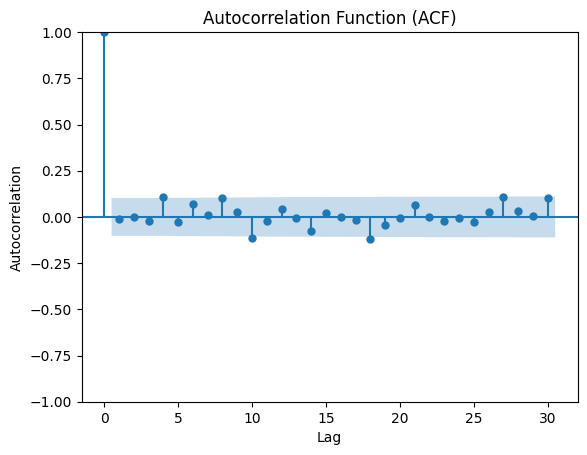

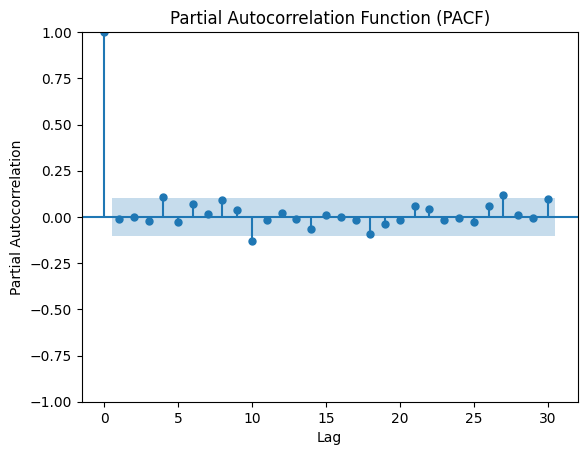

In [62]:
# Plot ACF using default method
plot_acf(df_reg['Qty'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF using ywm method
plot_pacf(df_reg['Qty'], lags=30,  method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [51]:
# Define the forecasted data
qty = df_train['Qty']

# Define a range of p and q values for the grid search
p_values = range(0, 6)
q_values = range(0, 6)

best_aic = np.inf
best_p = 0
best_q = 0

# Perform a grid search to find the best p and q values
for p in p_values:
    for q in q_values:
        try:
            model = sm.tsa.ARIMA(qty, order=(p, 0, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_p = p
                best_q = q
        except:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best p: {best_p}")
print(f"Best q: {best_q}")

Best AIC: 2489.752299235377
Best p: 2
Best q: 2


In [31]:
def rmse(y_actual, y_pred):
  """
  function to calculate RMSE
  """

  print(f'RMSE value{mean_squared_error(y_actual,y_pred)**0.5}')

def eval(y_actual, y_pred):
  """
  function to evaluate machine learning modelling
  """

  print(f'MAE value{mean_absolute_error(y_actual,y_pred)**0.5}')

MAE value3.5162372813058314
RMSE value14.46159930733353


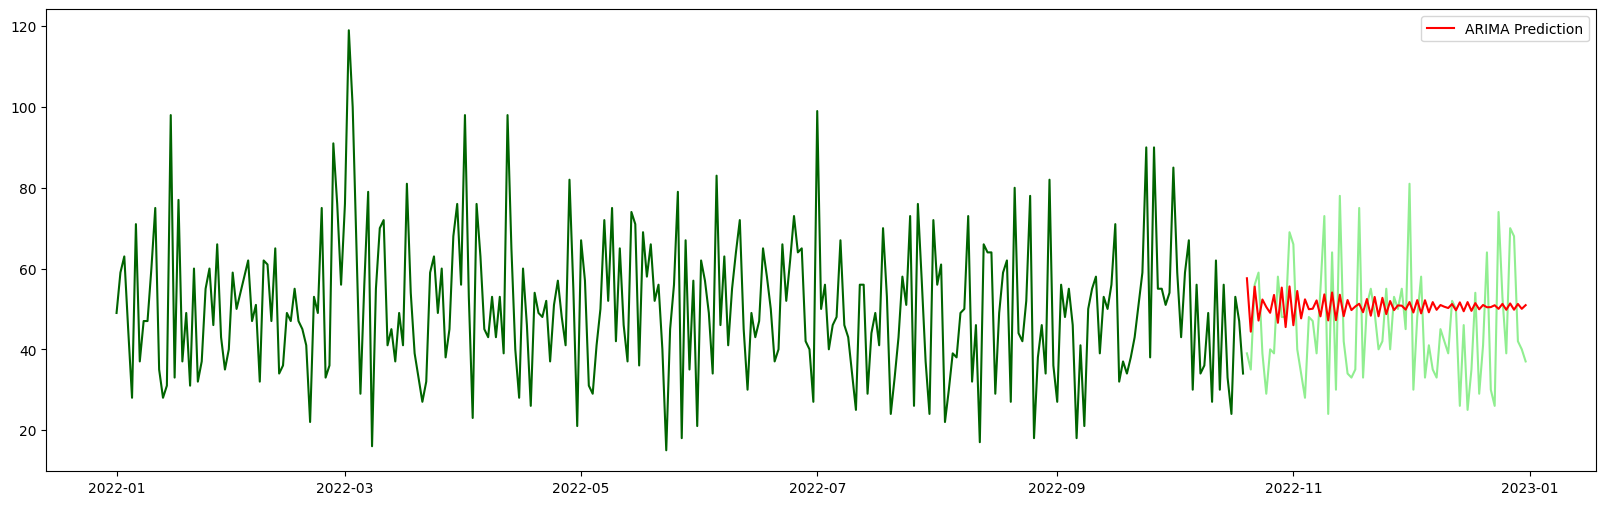

In [59]:
# Split the data into training and testing sets
split_date = '2022-10-19'
df_train = df_reg[df_reg['Date'] <= split_date]
df_test = df_reg[df_reg['Date'] > split_date]

# Set the 'Date' column as the index
df_train.set_index('Date', inplace=True)
df_test.set_index('Date', inplace=True)

# Define y with 'Qty'
y = df_train['Qty']

# Fit an ARIMA model
p = 2  # Order of autoregression (AR)
d = 0  # Degree of differencing (I)
q = 2  # Order of moving average (MA)

ARIMAmodel = ARIMA(y, order=(p, d, q))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

# Define the start and end indices for prediction
start = df_test.index[0]
end = df_test.index[-1]

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=start, end=end)
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']
eval(df_test['Qty'], y_pred_out)
rmse(df_test['Qty'], y_pred_out)

# Plot the original data and forecast
plt.figure(figsize=(20, 6))
plt.plot(df_train['Qty'], color='darkgreen')
plt.plot(df_test['Qty'], color='lightgreen')
plt.plot(y_pred_out, color= 'red', label='ARIMA Prediction')
plt.legend()
plt.show()

##**Try Auto Arima**

In [67]:
# Find which ARIMA models best suit using auto ARIMA
auto_arima_model = pm.auto_arima(df_train['Qty'], seasonal=False, stepwise=False, suppress_warnings=True, trace = True)
auto_arima_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3154.015, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2967.924, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2854.318, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2815.561, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2753.494, Time=0.27 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2739.996, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2686.138, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2509.752, Time=0.53 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2511.101, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2615.212, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2508.280, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1249.140
Date:                Sat, 28 Oct 2023   AIC                           2508.280
Time:                        03:42:27   BIC                           2526.663
Sample:                    01-01-2022   HQIC                          2515.643
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1255      0.224      0.559      0.576      -0.314       0.565
ar.L2          0.8745      0.224      3.897      0.000       0.435       1.314
ma.L1         -0.1496      0.248     -0.604      0.546      -0.635       0.336
ma.L2         -0.8249      0.248     -3.332      0.001      -1.310      -0.340
sigma2       298.5814     22.236     13.428      0.000     255.000     342.163
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                19.39
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.54
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Interestingly, after using auto ARIMA it found out that the best model is 2,0,2. So, let's move to forecast new dataframe with this model!**

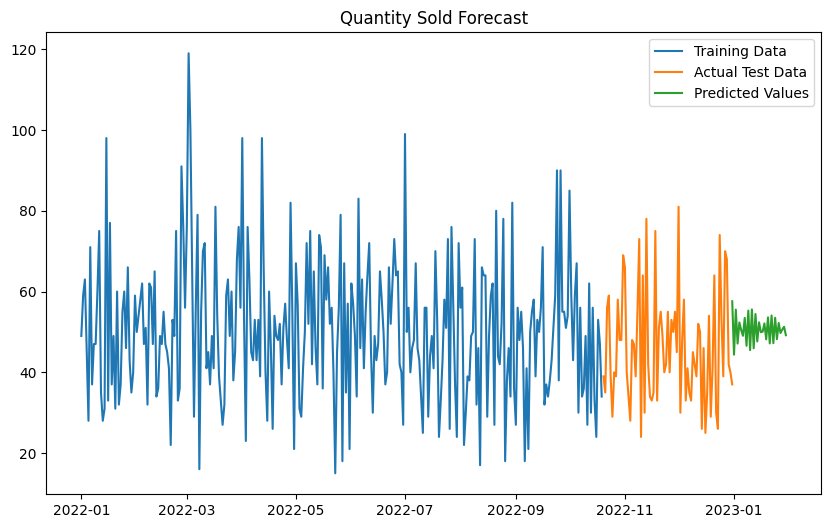

In [94]:
# Set the forecast period to 31 days
forecast_period = 31

# Generate the forecast
forecast = ARIMAmodel.forecast(steps=forecast_period)
forecast_index = pd.date_range(start=df_test.index[-1], periods=forecast_period)
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Qty'])

# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['Qty'], label='Training Data')
plt.plot(df_test.index, df_test['Qty'], label='Actual Test Data')
plt.plot(forecast_df.index, forecast, label='Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

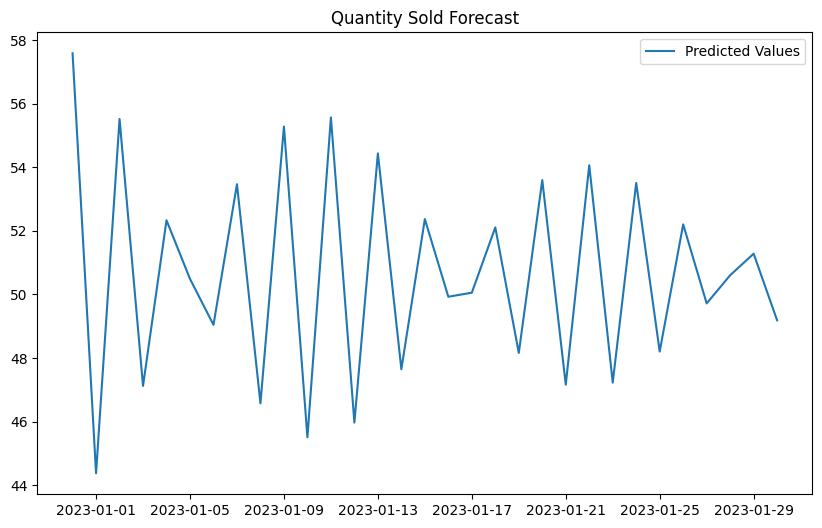

In [96]:
# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast, label='Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

In [97]:
# Check Mean Quantity Sold per Day
mean_qty_sold = forecast.mean().round()
print(f"Mean Quantity Sold Per day: {mean_qty_sold}")

Mean Quantity Sold Per day: 51.0


##**FORECAST QTY PER PRODUCT**

In [83]:
# Forecasting quantity of each product in 1 month period
df_prod_forecast = df_merge[['Qty', 'Date', 'Product Name']]

# Forecast for next 30 days for each product
product_list = df_prod_forecast['Product Name'].unique()

# Create a DataFrame to store the forecasts
forecast_df = pd.DataFrame({'Date': pd.date_range(start='2023-01-01', end='2023-01-31')})

# Function to fit ARIMA model and make forecasts
def fit_arima_forecast(df_forecast):
    model = ARIMA(df_forecast['Qty'], order=(2, 0, 2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=31)
    return forecast

# Group data by 'product_name', and then apply the forecasting function for each group
for i, group in df_prod_forecast.groupby('Product Name'):
    df_forecast = group[['Date', 'Qty']]
    df_forecast = df_forecast.groupby('Date')[['Qty']].sum()

    # Set the index to fill missing dates
    df_forecast = df_forecast.reindex(pd.date_range(start='2022-06-01', end='2022-12-31'), fill_value=0)

    # Fit ARIMA model and make forecasts
    forecast1 = fit_arima_forecast(df_forecast)

    # Add forecasts to the main DataFrame
    forecast_df[i] = forecast1.values

In [84]:
forecast_df = forecast_df.set_index('Date')
forecast_df.head()

,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
Date,,,,,,,,,,
2023-01-01,1.224736,5.201418,4.397431,6.612952,3.641642,7.294908,2.037563,3.205357,9.659732,4.834287
2023-01-02,1.289394,5.151419,5.280596,6.028234,4.131900,6.865177,2.885266,3.257194,9.452096,5.246935
2023-01-03,1.933064,5.153259,7.074478,5.359703,3.750148,5.924602,2.656599,3.262377,9.299989,5.519011
2023-01-04,2.114466,5.155586,5.135595,5.104503,4.226506,7.546034,2.221161,3.238098,9.123761,5.298811
2023-01-05,1.577020,5.157145,4.485349,5.356802,3.844929,6.303781,2.853473,3.210092,8.998188,5.394783


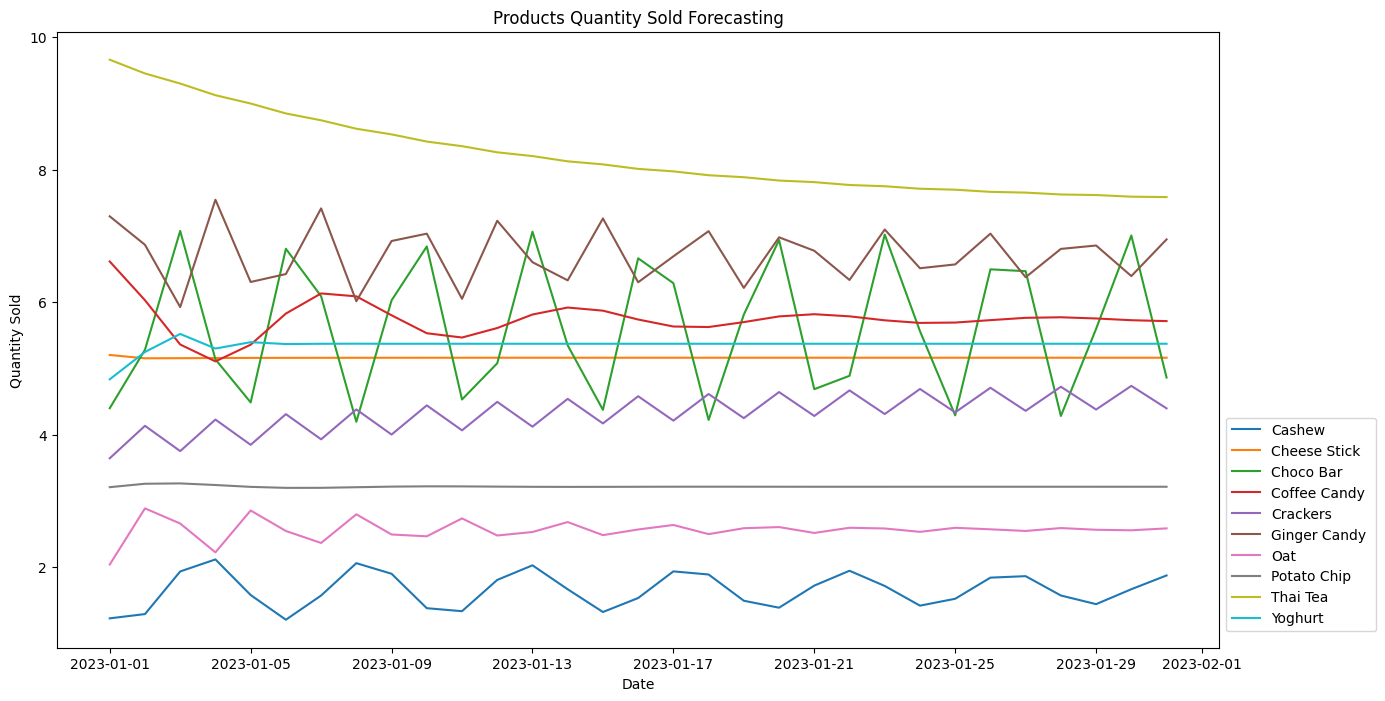

In [85]:
# Plot forecasting
plt.figure(figsize=(15, 8))
for i in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[i], label=i)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
plt.title('Products Quantity Sold Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

##**Daily Forecast Sales Average Per Product**

In [93]:
# Menghitung rata-rata penjualan qty masing-masing produk dalam satu bulan
average_sales_per_product = forecast_df.mean().round()
average_sales_per_product = pd.DataFrame(average_sales_per_product).reset_index()
average_sales_per_product.columns = ['Product Name', 'Forecasted Mean Quantity Sold Daily']

# Membuat DataFrame baru untuk menampilkan hasil
average_sales_df = tabulate(average_sales_per_product, headers='keys', tablefmt='fancy_grid', showindex=False)

# Menampilkan tabel rata-rata penjualan
print(average_sales_df)

╒════════════════╤═══════════════════════════════════════╕
│ Product Name   │   Forecasted Mean Quantity Sold Daily │
╞════════════════╪═══════════════════════════════════════╡
│ Cashew         │                                     2 │
├────────────────┼───────────────────────────────────────┤
│ Cheese Stick   │                                     5 │
├────────────────┼───────────────────────────────────────┤
│ Choco Bar      │                                     6 │
├────────────────┼───────────────────────────────────────┤
│ Coffee Candy   │                                     6 │
├────────────────┼───────────────────────────────────────┤
│ Crackers       │                                     4 │
├────────────────┼───────────────────────────────────────┤
│ Ginger Candy   │                                     7 │
├────────────────┼───────────────────────────────────────┤
│ Oat            │                                     3 │
├────────────────┼──────────────────────────────────────

##**Daily Actual Sales On The Same Period in Previous Year**

In [79]:
# Check mean per product sold daily
mean_qty_per_product = df_merge.groupby('Product Name')['Qty'].mean().round()
mean_qty_per_product_table = pd.DataFrame(mean_qty_per_product).reset_index()
mean_qty_per_product_table.columns = ['Product Name', 'Mean Quantity Sold Daily']

# Convert the DataFrame to a nicely formatted table
table = tabulate(mean_qty_per_product_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒════════════════╤════════════════════════════╕
│ Product Name   │   Mean Quantity Sold Daily │
╞════════════════╪════════════════════════════╡
│ Cashew         │                          2 │
├────────────────┼────────────────────────────┤
│ Cheese Stick   │                          3 │
├────────────────┼────────────────────────────┤
│ Choco Bar      │                          6 │
├────────────────┼────────────────────────────┤
│ Coffee Candy   │                          4 │
├────────────────┼────────────────────────────┤
│ Crackers       │                          4 │
├────────────────┼────────────────────────────┤
│ Ginger Candy   │                          5 │
├────────────────┼────────────────────────────┤
│ Oat            │                          2 │
├────────────────┼────────────────────────────┤
│ Potato Chip    │                          3 │
├────────────────┼────────────────────────────┤
│ Thai Tea       │                          4 │
├────────────────┼──────────────────────

#**CONCLUSION**

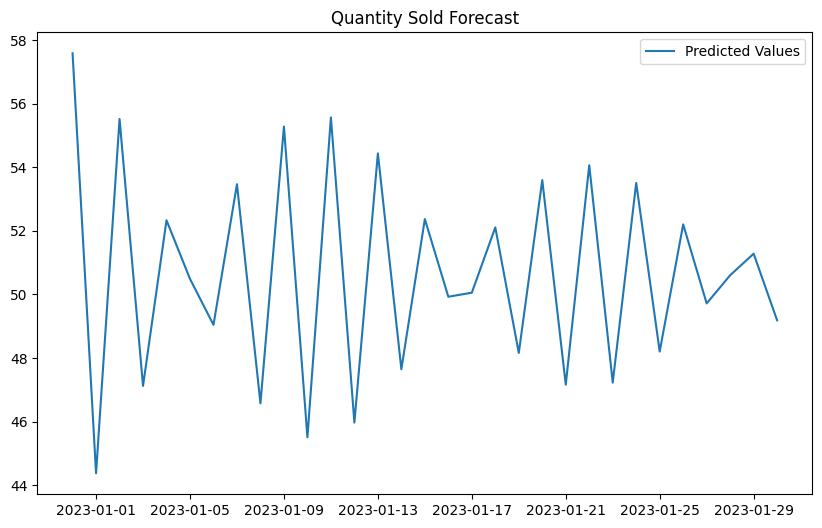

Based on the graph above, **it ilustrates the forecasted product quantity sold** on the next period of month which is **on January 2023**. The graph shows a representative visualization of the predicted sales in quantity. Additionally, I have calculated the **average** of **daily sales (Qty)** which is **51.**

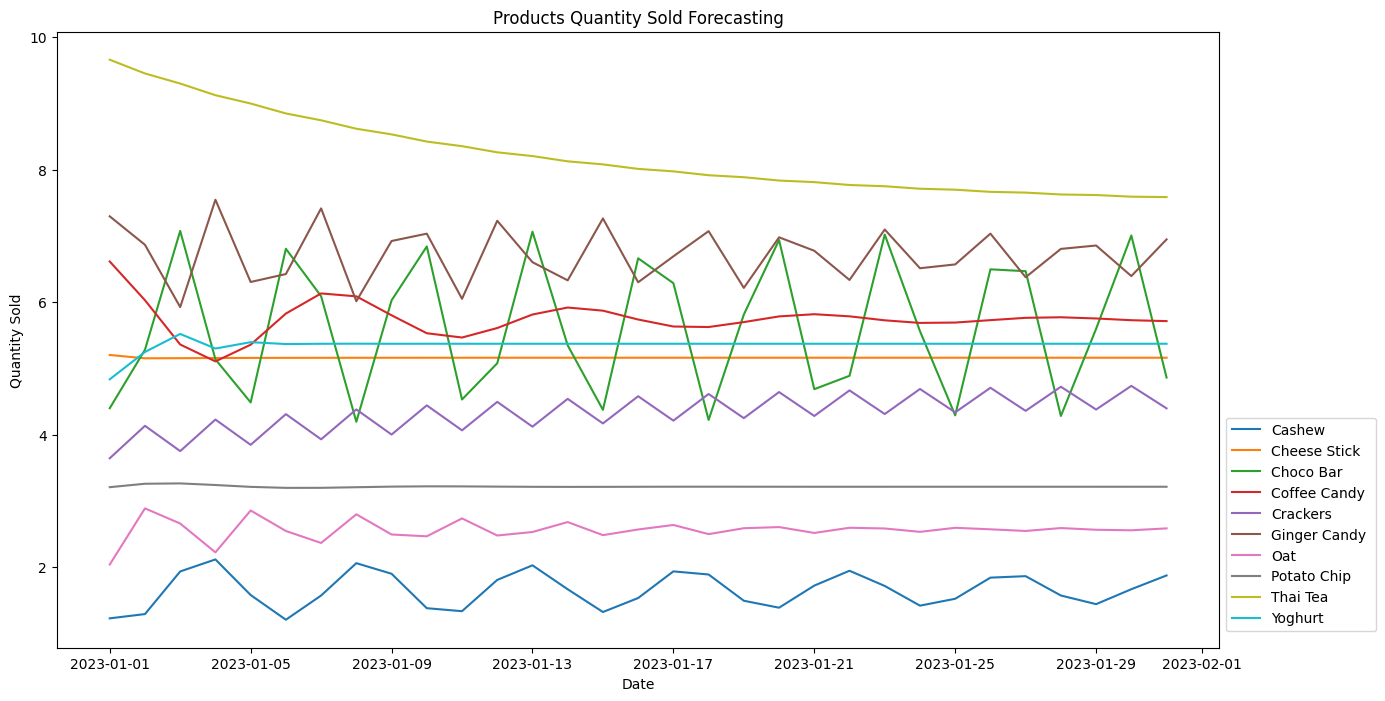

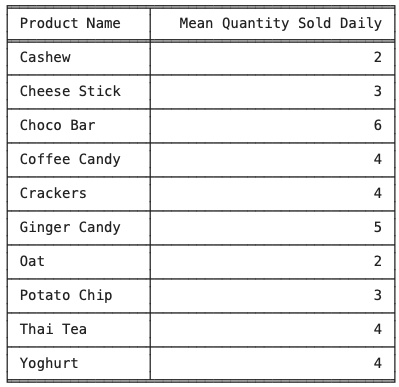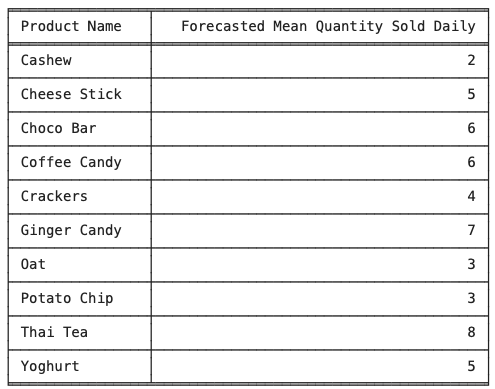

**The graph** above **ilustrated** the forecasted of **daily quantity sold per product.** The line with different color represent each product name. It shows **different pattern** for **each product**. While **the tables shows** the comparison between **daily quantity sold on January 2022 and January 2023 (next period)** which the value **predicted using** the **model made in this project.**